# Analyze
 **By Ming Choi, Version 20190526**

This is a collection of useful ML classification functions. The demo data used is from Kaggle **_Telecom Customer Churn Prediction_** dataset. (Size: 46.2 MB, Link: https://www.kaggle.com/abhinav89/telecom-customer/downloads/telecom-customer.zip/1)

In [3]:
import sys
import re
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display
from IPython.display import Image
import cleanser, analyzer

%matplotlib inline 
plt.style.use('ggplot')
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
matplotlib.rcParams['figure.figsize'] = (12, 8)

In [4]:
# Load data
df = pd.read_csv("Telecom_customer churn.csv", dtype=object, delimiter=',', skipinitialspace=True, skip_blank_lines=True, encoding="ISO-8859-1")
df.shape

(100000, 100)

In [5]:
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.5,0.2475,0,0,0,0,0,-157.25,-18.9975,0.666666667,0,0.666666667,0,6.333333333,0,52.33333333,0,42.33333333,0,45,0,0,0,0,18,0,90.64333333,0,97.17666667,0,0,0,0,58,0,132.6,0,24,0,55.22,0,1.333333333,52.33333333,45,0,0.333333333,1,61,2,1,U,A,N,1652,4228,1504.62,1453.44,4085,1602,29.66,83.37,32.69,272,116,30,322,136,38,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.9899902,2,2,WCMB,0,0,O,15,S,S,1,M,4,3,C,A,0,N,U,U,U,U,U,Y,361,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0,0,532.25,50.9875,8.333333333,0,1,0,61.33333333,0,263.3333333,0,69,0,193.3333333,0,1.666666667,6.333333333,5.463333333,53,0.333333333,189.3966667,0,55.28,46.33333333,24.21666667,6.333333333,3.696666667,83.66666667,0,75.33333333,0,157,0,169.3433333,0,9.333333333,263.3333333,193.3333333,0,5.666666667,0,56,1,1,N,EA,N,14654,26400,2851.68,2833.88,26367,14624,51.53,479.4,265.89,305,158,40,477,275,48,U,CHICAGO AREA,N,N,NaN,7,6,WC,1,1,NaN,1,S,S,1,M,5,1,C,A,0,Z,U,U,U,U,U,Y,240,1000002
2,16.99,10.25,16.99,0,0,0,0,0,0,-4.25,0,0.333333333,0,0,0,2.666666667,0,9,0,0.333333333,0,6,0,0,0,0,0.333333333,0,5.426666667,0,0,0,0,0,0,5,0,5.193333333,0,1,0,0.233333333,0,0.333333333,9,6,0,0,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11,6,17,S,GREAT LAKES AREA,N,N,29.98999023,2,1,NaN,0,0,O,7,S,M,2,M,5,2,C,A,0,N,U,Y,U,U,U,Y,1504,1000003
3,38,7.5,38,0,0,0,0,0,0,-1.5,0,0,0,0,0,0,0,3.666666667,0,1.333333333,0,3.666666667,0,0,0,0,1.333333333,0,8.41,0,0.413333333,0.333333333,0.256666667,0,0,1.333333333,0,3.38,0,3.666666667,0,5.45,0,0,3.666666667,3.666666667,0,0,0,60,1,1,Y,B,N,1502,3065,2000.9,1941.81,3035,1479,40.45,63.23,30.81,8,3,38,50,25,40,T,CHICAGO AREA,N,N,29.98999023,1,1,NaN,0,0,NaN,6,M,M,4,M,6,1,C,D,0,U,Y,U,U,U,U,Y,1812,1000004
4,55.23,570.5,71.98,0,0,0,0,0,0,38.5,0,9.666666667,0,0.666666667,0,77,0,222.3333333,0,94.66666667,0,137,0,8.666666667,15,11.07666667,66,0,285.2333333,0,106.33,14.66666667,10.81666667,0.666666667,0.366666667,97.33333333,0,173.4766667,0,90.33333333,0,218.0866667,0,10.33333333,222.3333333,137,0,0,0,57,1,1,Y,A,N,4485,14028,2181.12,2166.48,13965,4452,38.69,249.38,79.5,558,191,55,586,196,80,U,NEW ENGLAND AREA,Y,N,149.9899902,6,4,WCMB,0,0,R,5,M,S,1,M,6,1,C,O,0,I,U,U,U,U,U,Y,434,1000005


In [6]:
# cleanser.analyze(df)

In [7]:
settings = {
    'rev_Mean':	['float', '', ''],	
    'mou_Mean':	['float', '', ''],	
    'totmrc_Mean':	['float', '', ''],	
    'da_Mean':	['float', '', ''],	
    'ovrmou_Mean':	['float', '', ''],	
    'ovrrev_Mean':	['float', '', ''],	
    'vceovr_Mean':	['float', '', ''],	
    'datovr_Mean':	['binary', '', ''],	# TODO: HAS NAN 0.4% ???
    'roam_Mean':	['float', '', ''],	
    'change_mou':	['float', '', ''],	
    'change_rev':	['float', '', ''],	
    'drop_vce_Mean':	['float', '', ''],	
    'drop_dat_Mean':	['binary', '', ''],	
    'blck_vce_Mean':	['float', '', ''],	
    'blck_dat_Mean':	['binary', '', ''],	
    'unan_vce_Mean':	['float', '', ''],	
    'unan_dat_Mean':	['binary', '', ''],	
    'plcd_vce_Mean':	['float', '', ''],	
    'plcd_dat_Mean':	['binary', '', ''],	
    'recv_vce_Mean':	['float', '', ''],	
    'recv_sms_Mean':	['binary', '', ''],	
    'comp_vce_Mean':	['float', '', ''],	
    'comp_dat_Mean':	['binary', '', ''],	
    'custcare_Mean':	['float', '', ''],	
    'ccrndmou_Mean':	['float', '', ''],	
    'cc_mou_Mean':	['float', '', ''],	
    'inonemin_Mean':	['float', '', ''],	
    'threeway_Mean':	['float', '', ''],	
    'mou_cvce_Mean':	['float', '', ''],	
    'mou_cdat_Mean':	['binary', '', ''],	
    'mou_rvce_Mean':	['float', '', ''],	
    'owylis_vce_Mean':	['float', '', ''],	
    'mouowylisv_Mean':	['float', '', ''],	
    'iwylis_vce_Mean':	['float', '', ''],	
    'mouiwylisv_Mean':	['float', '', ''],	
    'peak_vce_Mean':	['float', '', ''],	
    'peak_dat_Mean':	['binary', '', ''],	
    'mou_peav_Mean':	['float', '', ''],	
    'mou_pead_Mean':	['binary', '', ''],	
    'opk_vce_Mean':	['float', '', ''],	
    'opk_dat_Mean':	['binary', '', ''],	
    'mou_opkv_Mean':	['float', '', ''],	
    'mou_opkd_Mean':	['binary', '', ''],	
    'drop_blk_Mean':	['float', '', ''],	
    'attempt_Mean':	['float', '', ''],	
    'complete_Mean':	['float', '', ''],	
    'callfwdv_Mean':	['binary', '', ''],	
    'callwait_Mean':	['float', '', ''],	
    'churn':	['binary', '', ''],	
    'months':	['int', '', ''],	
    'uniqsubs':	['class', '', ''],	# 0.01 % int unique ---------------
    'actvsubs':	['class', '', ''],	# 0.01 % int unique ---------------
    'new_cell':	['class', '', ''],	
    'crclscod':	['drop', '', ''],	# 0.05 % str unique XXXXXXXXXXXXX
    'asl_flag':	['binary', '', ''],	
    'totcalls':	['int', '', ''],	
    'totmou':	['int', '', ''],	
    'totrev':	['float', '', ''],	
    'adjrev':	['float', '', ''],	
    'adjmou':	['int', '', ''],	
    'adjqty':	['int', '', ''],	
    'avgrev':	['float', '', ''],	
    'avgmou':	['float', '', ''],	
    'avgqty':	['float', '', ''],	
    'avg3mou':	['int', '', ''],	
    'avg3qty':	['int', '', ''],	
    'avg3rev':	['int', '', ''],	
    'avg6mou':	['int', '', ''],	
    'avg6qty':	['int', '', ''],	
    'avg6rev':	['int', '', ''],	
    'prizm_social_one':	['class', '', ''],	
    'area':	['class', '', ''],	
    'dualband':	['binary', '', ''],	
    'refurb_new':	['class', '', ''],	
    'hnd_price':	['float', '', ''],	
    'phones':	['class', '', ''],	# 0.02 % int unique ---------------
    'models':	['class', '', ''],	# 0.01 % int unique ---------------
    'hnd_webcap':	['class', '', ''],	
    'truck':	['binary', '', ''],	# TODO: HAS NAN 1.7% ???
    'rv':	['binary', '', ''],	# TODO: HAS NAN 1.7% ???
    'ownrent':	['class', '', ''],	
    'lor':	['class', '', ''],	# 0.02 % int unique ---------------
    'dwlltype':	['class', '', ''],	
    'marital':	['class', '', ''],	
    'adults':	['class', '', ''],	# 0.01 % int unique ---------------
    'infobase':	['class', '', ''],	
    'income':	['class', '', ''],	# 0.01 % int unique ---------------
    'numbcars':	['class', '', ''],	# 0.0 % int unique ---------------
    'HHstatin':	['class', '', ''],	
    'dwllsize':	['class', '', ''],	
    'forgntvl':	['binary', '', ''],	# TODO: HAS NAN 1.7% ???
    'ethnic':	['class', '', ''],	
    'kid0_2':	['class', '', ''],	
    'kid3_5':	['class', '', ''],	
    'kid6_10':	['class', '', ''],	
    'kid11_15':	['class', '', ''],	
    'kid16_17':	['class', '', ''],	
    'creditcd':	['binary', '', ''],	# TODO: HAS NAN 1.7% ???
    'eqpdays':	['int', '', ''],	
    'Customer_ID':	['drop', '', ''],	# 100.0 % int unique XXXXXXXXXXXX
}

In [8]:
# Auto clean data accordingly
df = cleanser.clean_data(df, settings, 0)

In [9]:
# Further mannual cleaning of data

# df['SOURCE_CODE'] = df['SOURCE_CODE'].str.replace('\..+', '.')
# df['EMAIL_ADDR'] = df['EMAIL_ADDR'].str.replace('.+@', '@')
# df['HOUR'] = df['CREATION_DATE_TIME'].apply(lambda x: x.hour)
# df['CARD_NUMBER'] = df['CARD_NUMBER'].apply(lambda x: x[:4])

In [10]:
# Drop timestamp columns
# df3 = cleanser.drop_timestamp(df2, settings, 0)
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0,0.0,-157.25,-18.9975,0.666667,0,0.666667,0,6.333333,0,52.333333,0,42.333333,0,45.000000,0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0,132.600000,0,24.000000,0,55.220000,0,1.333333,52.333333,45.000000,0,0.333333,1,61,2,1,U,0,1652,4228,1504.62,1453.44,4085,1602,29.66,83.37,32.69,272,116,30,322,136,38,S,NORTHWEST/ROCKY MOUNTAIN AREA,1,N,149.989990,2,2,WCMB,0,0,O,15,S,S,1,M,4,3,C,A,0,N,U,U,U,U,U,1,361
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0,0.0,532.25,50.9875,8.333333,0,1.000000,0,61.333333,0,263.333333,0,69.000000,0,193.333333,0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0,75.333333,0,157.000000,0,169.343333,0,9.333333,263.333333,193.333333,0,5.666667,0,56,1,1,N,0,14654,26400,2851.68,2833.88,26367,14624,51.53,479.40,265.89,305,158,40,477,275,48,U,CHICAGO AREA,0,N,101.875763,7,6,WC,1,1,Missing,1,S,S,1,M,5,1,C,A,0,Z,U,U,U,U,U,1,240
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0,0.0,-4.25,0.0000,0.333333,0,0.000000,0,2.666667,0,9.000000,0,0.333333,0,6.000000,0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0,5.193333,0,1.000000,0,0.233333,0,0.333333,9.000000,6.000000,0,0.000000,1,58,1,1,Y,0,7903,24385,2155.91,1934.47,24303,7888,34.54,433.98,140.86,12,7,17,11,6,17,S,GREAT LAKES AREA,0,N,29.989990,2,1,Missing,0,0,O,7,S,M,2,M,5,2,C,A,0,N,U,Y,U,U,U,1,1504
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0,0.0,-1.50,0.0000,0.000000,0,0.000000,0,0.000000,0,3.666667,0,1.333333,0,3.666667,0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0,3.380000,0,3.666667,0,5.450000,0,0.000000,3.666667,3.666667,0,0.000000,0,60,1,1,Y,0,1502,3065,2000.90,1941.81,3035,1479,40.45,63.23,30.81,8,3,38,50,25,40,T,CHICAGO AREA,0,N,29.989990,1,1,Missing,0,0,Missing,6,M,M,4,M,6,1,C,D,0,U,Y,U,U,U,U,1,1812
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0,0.0,38.50,0.0000,9.666667,0,0.666667,0,77.000000,0,222.333333,0,94.666667,0,137.000000,0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0,173.476667,0,90.333333,0,218.086667,0,10.333333,222.333333,137.000000,0,0.000000,0,57,1,1,Y,0,4485,14028,2181.12,2166.48,13965,4452,38.69,249.38,79.50,558,191,55,586,196,80,U,NEW ENGLAND AREA,1,N,149.989990,6,4,WCMB,0,0,R,5,M,S,1,M,6,1,C,O,0,I,U,U,U,U,U,1,434


In [11]:
df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,dualband,hnd_price,truck,rv,forgntvl,creditcd,eqpdays
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.000020,1.286405,-13.933818,-1.021067,5.955085,0.00218,4.022917,0.001060,27.784905,0.002340,144.881677,0.011680,55.085152,0.000750,108.892535,0.009970,1.790838,4.666880,3.683328,29.766550,0.284720,227.763520,0.0001,111.654562,24.753320,28.467865,7.894360,18.193037,88.480285,0.00673,174.080788,0.000080,66.003498,0.00742,165.280703,0.000060,10.044298,145.752225,109.666977,0.000300,1.782928,0.495620,18.833990,0.139360,2877.141930,7648.362390,1031.924988,960.111528,7546.313300,2836.366920,57.913832,483.726493,173.554507,519.641210,180.337320,59.193330,495.166050,173.301370,57.017590,0.722650,101.875763,0.185550,0.081150,0.056970,0.672340,391.928390
std,46.208972,524.229868,23.581283,2.173729,97.122320,30.446392,30.002391,0.004472,14.685090,274.854774,50.138337,8.954715,0.04664,10.672202,0.032541,38.358734,0.048317,158.267711,0.107442,86.841198,0.027376,118.580079,0.099351,5.315570,12.761953,10.539981,55.833753,1.092101,264.403894,0.0100,162.691285,34.414822,48.962903,16.145590,41.421462,103.066103,0.08176,207.673553,0.008944,91.456885,0.08582,237.332918,0.007746,15.418406,159.348094,119.594305,0.017318,5.353953,0.499983,9.655794,0.346324,3790.863474,8666.552025,852.907511,840.170815,8594.883577,3756.513882,36.161292,438.485213,167.824576,533.634073,192.725835,46.695429,496.825743,182.532009,41.341163,0.447693,60.746760,0.388745,0.273067,0.231786,0.469362,256.483905
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,3.650000,2.400000,0.000000,0.000000,0.480000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,0.000000,9.989998,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,33.311875,151.5

In [12]:
# Perform one hot encoding according to column types
df = cleanser.one_hot(df, settings, logging=False)

display(df.shape)
display(df.head())

(100000, 260)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,...,numbcars_3,numbcars_Missing,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,HHstatin_Missing,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_Missing,dwllsize_N,dwllsize_O,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_Missing,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_U,kid0_2_Y,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0,0.0,-157.25,-18.9975,0.666667,0,0.666667,0,6.333333,0,52.333333,0,42.333333,0,45.000000,0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0,132.600000,0,24.000000,0,55.220000,0,1.333333,52.333333,45.000000,0,0.333333,1,61,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0,0.0,532.25,50.9875,8.333333,0,1.000000,0,61.333333,0,263.333333,0,69.000000,0,193.333333,0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0,75.333333,0,157.000000,0,169.343333,0,9.333333,263.333333,193.333333,0,5.666667,0,56,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0,0.0,-4.25,0.0000,0.333333,0,0.000000,0,2.666667,0,9.000000,0,0.333333,0,6.000000,0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0,5.193333,0,1.000000,0,0.233333,0,0.333333,9.000000,6.000000,0,0.000000,1,58,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0,0.0,-1.50,0.0000,0.000000,0,0.000000,0,0.000000,0,3.666667,0,1.333333,0,3.666667,0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0,3.380000,0,3.666667,0,5.450000,0,0.000000,3.666667,3.666667,0,0.000000,0,60,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0,0.0,38.50,0.0000,9.666667,0,0.666667,0,77.000000,0,222.333333,0,94.666667,0,137.000000,0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0,173.476667,0,90.333333,0,218.086667,0,10.333333,222.333333,137.000000,0,0.000000,0,57,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [13]:
# Split data for ML Model analysis
X = df.loc[:, df.columns != 'churn']
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
                
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (80000, 259)
y_train (80000,)
X_test (20000, 259)
y_test (20000,)


In [14]:
display(len(X.columns))
# list(X.columns)

259

# Apply Models

In [15]:
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Accuracy: 0.50885
RMSE: 0.23391838047765778


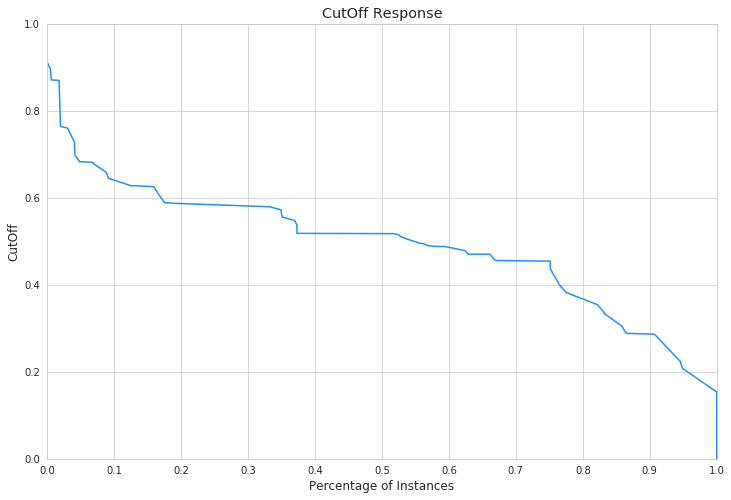

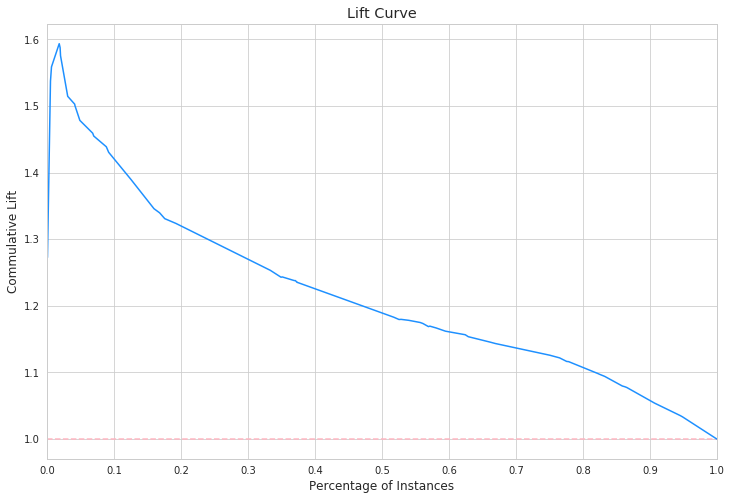

No handles with labels found to put in legend.


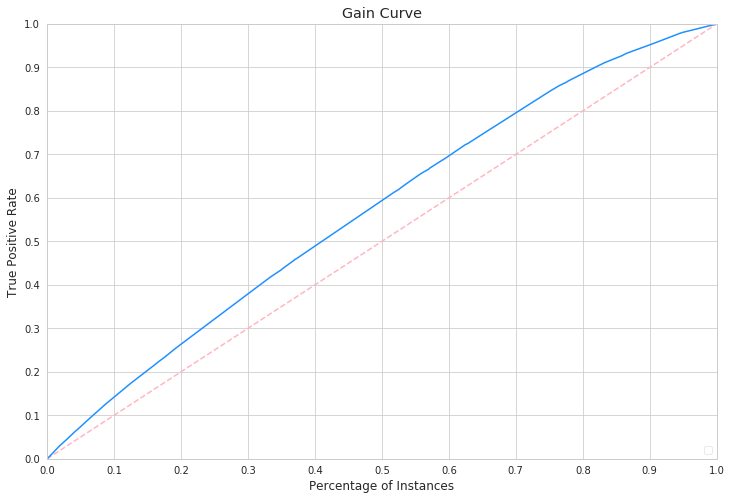

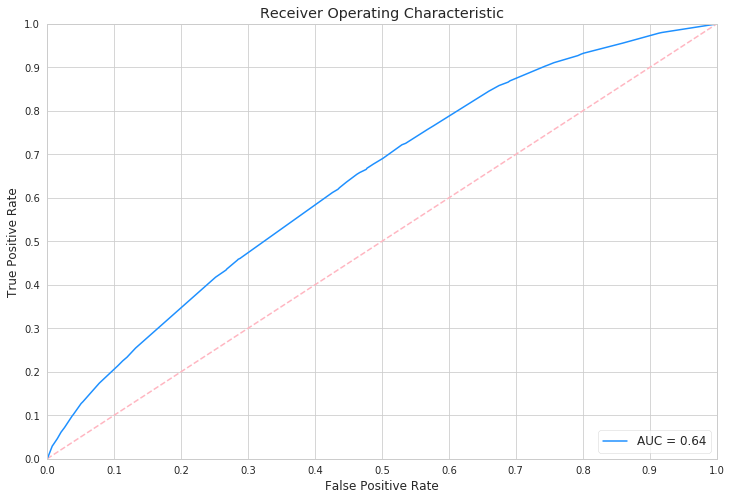

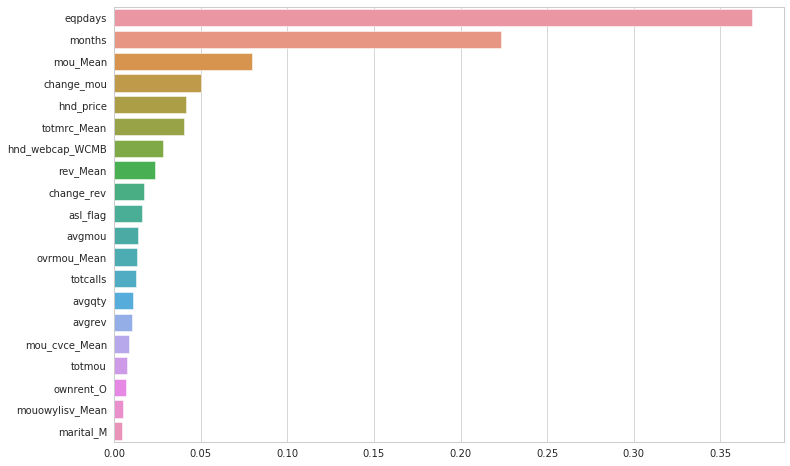

In [17]:
classifier = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
analyzer.evaluate(y_test, y_score, threshold=1, gain_lift=True)
analyzer.evaluate_importance(X, classifier)

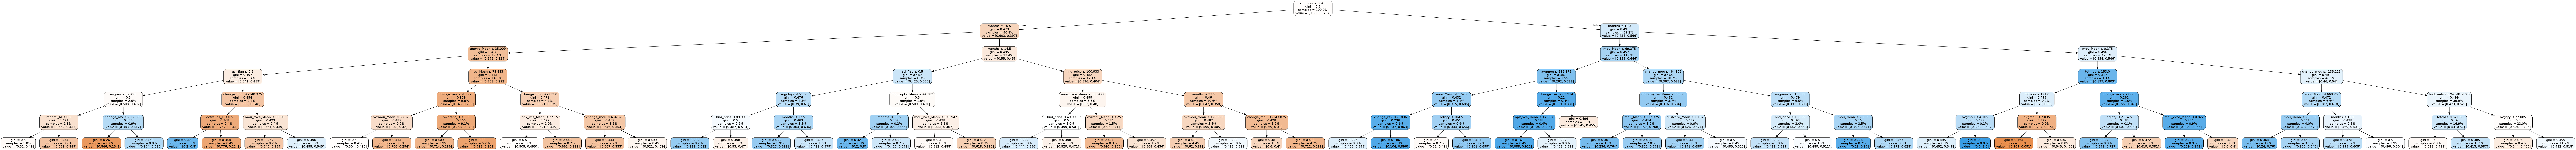

In [20]:
Image(analyzer.viz_tree(X, classifier))

In [16]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.50885
RMSE: 0.24019910666757047


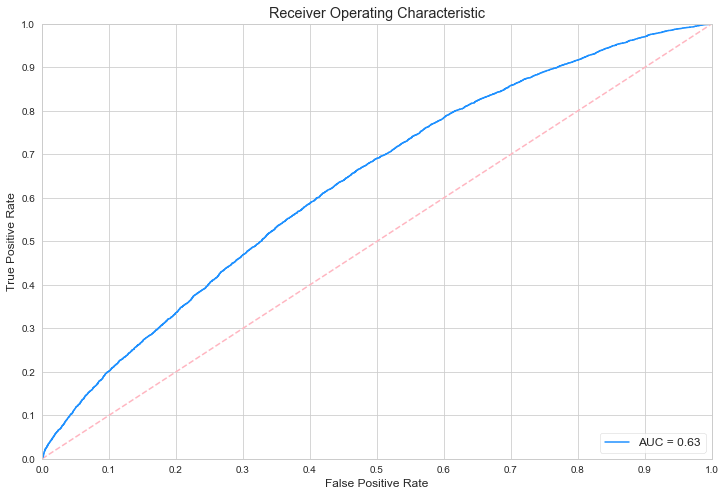

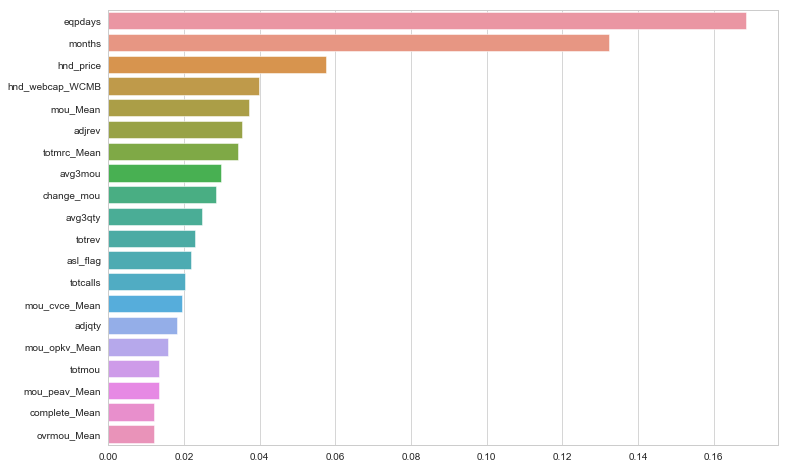

In [21]:
classifier = RandomForestClassifier(max_depth=4, n_estimators=500)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
analyzer.evaluate(y_test, y_score, 1)
analyzer.evaluate_importance(X, classifier)